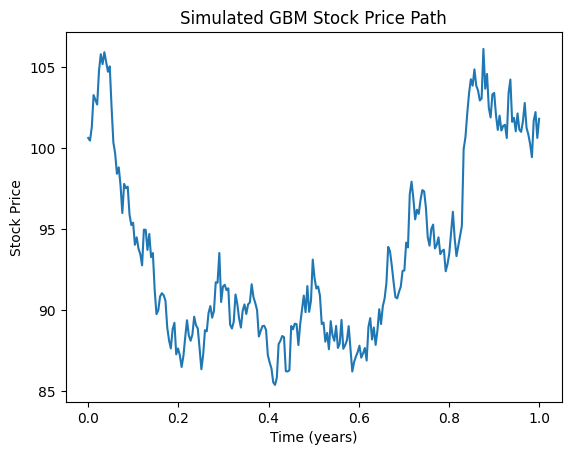

(np.float64(4.6490288802953256e-05), np.float64(0.012179250201719592))

In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters for the GBM process
np.random.seed(42)
S0 = 100  # Initial stock price
mu_true = 0.05  # True drift
sigma_true = 0.2  # True volatility
T = 1  # Total time in years
n = 252  # Number of time steps (daily data, 252 trading days in a year)
dt = T / n  # Time step

# Simulate the stock price using the GBM formula
t = np.linspace(0, T, n)
W = np.random.normal(0, np.sqrt(dt), n)  # Brownian increments
log_returns = (mu_true - 0.5 * sigma_true**2) * dt + sigma_true * W
S = S0 * np.exp(np.cumsum(log_returns))  # Stock price from cumulative log returns

# Plot the simulated GBM stock price path
plt.plot(t, S)
plt.title('Simulated GBM Stock Price Path')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.show()

# Estimate GBM parameters using MLE

# Log returns from the simulated stock prices
log_returns = np.diff(np.log(S))  # Log returns are the first differences of log prices

# Define the negative log-likelihood function for MLE
def negative_log_likelihood(params, returns):
    mu, sigma = params
    n = len(returns)
    # Log-likelihood formula for normal distribution
    ll = -(-n * np.log(sigma) - (1 / (2 * sigma**2)) * np.sum((returns - mu)**2))
    return ll  # We minimize the negative log-likelihood

# Initial guess for parameters
initial_guess = [0.01, 0.1]  # Initial guess for mu and sigma

# Perform MLE using the minimize function
result = minimize(negative_log_likelihood, initial_guess, args=(log_returns), 
                  bounds=[(-1, 1), (1e-5, 1)])  # Bounds to ensure reasonable results

# Extract estimated parameters
mu_est, sigma_est = result.x

# Print the estimated parameters
mu_est, sigma_est


In [2]:
log_returns

array([-1.62291884e-03,  8.27915618e-03,  1.93074202e-02, -2.83100761e-03,
       -2.83080077e-03,  2.00152589e-02,  9.78781638e-03, -5.79577368e-03,
        6.95466165e-03, -5.71946652e-03, -5.74859574e-03,  3.16748570e-03,
       -2.39860177e-02, -2.16128744e-02, -6.96510937e-03, -1.26414251e-02,
        4.07819187e-03, -1.13209804e-02, -1.76743065e-02,  1.85844864e-02,
       -2.72546640e-03,  9.69823029e-04, -1.78310923e-02, -6.73953003e-03,
        1.51654089e-03, -1.43821084e-02,  4.85239774e-03, -7.44828858e-03,
       -3.55594819e-03, -7.46174313e-03,  2.34555592e-02, -5.10014288e-05,
       -1.32068575e-02,  1.04821394e-02, -1.52621366e-02,  2.75048157e-03,
       -2.45704752e-02, -1.66145237e-02,  2.59926606e-03,  9.42285201e-03,
        2.27808502e-03, -1.33798378e-03, -3.67450237e-03, -1.85085785e-02,
       -8.95013694e-03, -5.68445539e-03,  1.34375358e-02,  4.44823114e-03,
       -2.20931705e-02,  4.20212184e-03, -4.73253309e-03, -8.40936795e-03,
        7.82544449e-03,  